## HW2: Q6

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cvxpy as cp

In [2]:
# Define function
f_opt = lambda t: np.sin(2*np.pi*t)


# Number of samples
M = 100

# Degree + 1
N = 9

# Choose sample location
tt = np.linspace(-1, 1, M)

# Compute "clean" function
ff = f_opt(tt)

# Form "observation matrix"
A = np.zeros((M,N))
for i in np.arange(N):
    A[:,i] = tt ** i

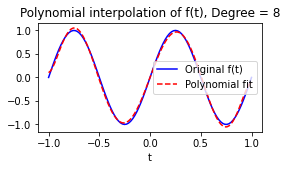

In [9]:
# Compute and plot least squares polynomial fit for "noise free" samples
xhat = np.linalg.pinv(A) @ ff
fhat = A @ xhat

plt.figure(figsize=(4,2))
plt.plot(tt, ff, 'b')
plt.plot(tt, fhat, 'r--' )
plt.xlabel('t')
plt.title('Polynomial interpolation of f(t), Degree = {}'.format(N-1))
plt.legend(('Original f(t)','Polynomial fit'))
plt.show()

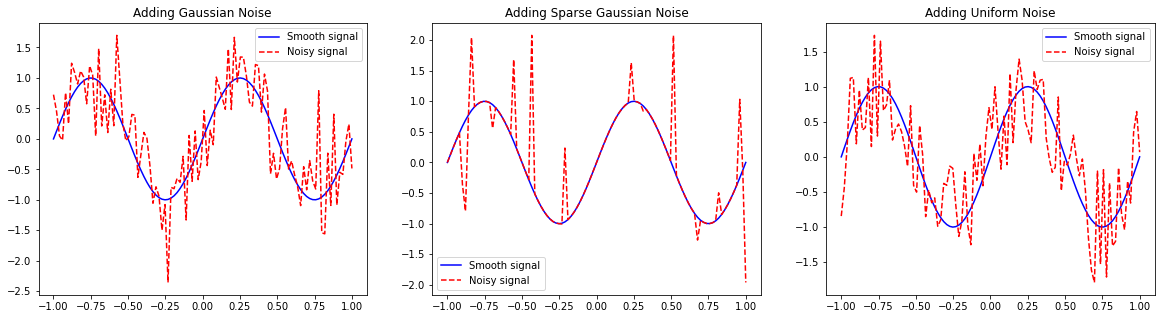

In [4]:
## Construct noisy observations
np.random.seed(2021) # Set random seed so results are repeatable

# Random gaussian noise
noise1 = np.random.randn(M)
noise1 = 5*noise1/np.linalg.norm(noise1)
y1 = ff + noise1

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(tt, ff, 'b')
plt.plot(tt, y1, 'r--' )
plt.title("Adding Gaussian Noise")
plt.legend(("Smooth signal","Noisy signal"))

# Sparse gaussian noise
K = 15
Gamma = np.random.choice(M,K,0) 
noise2 = np.zeros(M)
noise2[Gamma] = np.random.randn(K)
noise2 = 5*noise2/np.linalg.norm(noise2)
y2 = ff + noise2

plt.subplot(132)
plt.plot(tt, ff, 'b')
plt.plot(tt, y2, 'r--' )
plt.title("Adding Sparse Gaussian Noise")
plt.legend(("Smooth signal","Noisy signal"))

# Uniform noise
noise3 = np.random.rand(M)-0.5
noise3 = 5*noise3/np.linalg.norm(noise3)
y3 = ff + noise3

plt.subplot(133)
plt.plot(tt, ff, 'b')
plt.plot(tt, y3, 'r--' )
plt.title("Adding Uniform Noise")
plt.legend(("Smooth signal","Noisy signal"))
plt.show()


Part a: L2 Norm
Noise: Gaussian
 Norm:  2
The optimal value is 4.918762447940347
The optimal x is
[-5.41565440e-02  5.85480654e+00  1.78657019e+00 -3.57705871e+01
 -5.86719783e+00  5.61985376e+01  7.11501676e+00 -2.67703905e+01
 -2.88602327e+00]
The norm of the residual is  4.918762447940347
L2 norm error:  1.313083875989311


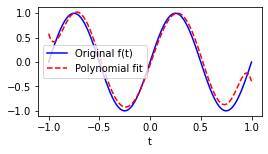

Noise: Sparse Gaussian
 Norm:  2
The optimal value is 4.637298667378043
The optimal x is
[-5.04594763e-02  5.97245687e+00  4.00195699e+00 -3.76369266e+01
 -1.83443869e+01  6.03509742e+01  2.82277454e+01 -2.91542617e+01
 -1.42837245e+01]
The norm of the residual is  4.637298667378043
L2 norm error:  1.783139849118314


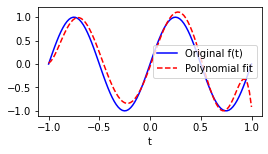

Noise: Uniform
 Norm:  2
The optimal value is 4.632029354189919
The optimal x is
[  0.15285481   4.0636107   -1.15815685 -21.3491746    0.44957239
  25.1218278    3.15769343  -7.37306211  -2.6669358 ]
The norm of the residual is  4.632029354189919
L2 norm error:  1.97304969787963


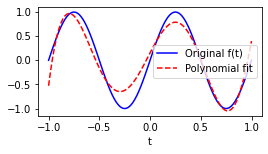

Part b: Linfinity Norm
Noise: Gaussian
 Norm:  inf
The optimal value is 1.122165184004115
The optimal x is
[-7.78052821e-02  5.35042917e+00 -7.54656407e+00 -3.06934116e+01
  5.36035788e+01  4.82068999e+01 -9.91575339e+01 -2.36081526e+01
  5.42822139e+01]
The norm of the residual is  1.122165184004115
L2 norm error:  4.238243963103762


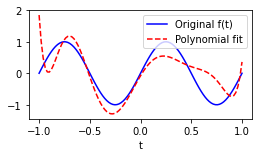

Noise: Sparse Gaussian
 Norm:  inf
The optimal value is 1.236736021279523
The optimal x is
[ -0.11148423   4.04870082  11.90737737 -26.56456136 -40.24693255
  41.89440487  50.88509228 -19.12237137 -23.41461594]
The norm of the residual is  1.236736021279523
L2 norm error:  7.193996885000483


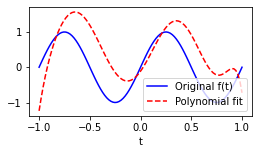

Noise: Uniform
 Norm:  inf
The optimal value is 0.7969365765552866
The optimal x is
[  0.18318777   5.22344841  -3.06688361 -30.78772034   7.58679619
  45.32743891  -4.97217911 -19.83843074   0.14757805]
The norm of the residual is  0.7969365765552866
L2 norm error:  1.4464058404842275


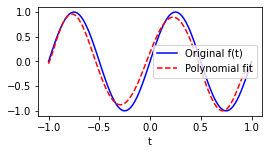

Part c: L1 norm
Noise: Gaussian
 Norm:  1
The optimal value is 38.484017912489755
The optimal x is
[-2.02606015e-02  5.56021333e+00  1.89806727e+00 -3.19237899e+01
 -6.68881457e+00  4.67035587e+01  8.29250449e+00 -2.08130379e+01
 -3.49360755e+00]
The norm of the residual is  38.484017912489755
L2 norm error:  1.373390298124833


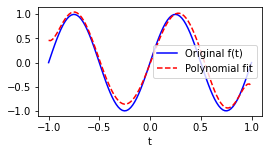

Noise: Sparse Gaussian
 Norm:  1
The optimal value is 18.035896068630137
The optimal x is
[-3.25585670e-03  5.96334139e+00  3.02483506e-01 -3.57782939e+01
 -2.08236418e+00  5.47461715e+01  4.48567807e+00 -2.53361537e+01
 -3.00070722e+00]
The norm of the residual is  18.035896068630137
L2 norm error:  0.933249663880874


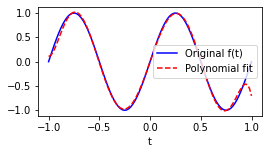

Noise: Uniform
 Norm:  1
The optimal value is 39.3292881074418
The optimal x is
[  0.1714017    4.62478138   0.81184074 -23.26814626 -12.48753826
  24.72959224  24.98863656  -5.23303979 -13.47432668]
The norm of the residual is  39.3292881074418
L2 norm error:  2.6547860481695906


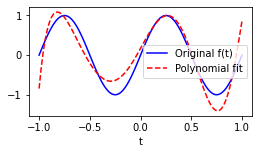

In [8]:
M = 100
N = 9
np.random.seed(2021)

# Form "observation matrix"
A = np.zeros((M,N))
for i in np.arange(N):
    A[:,i] = tt ** i
# A = np.random.randn(M, N)

for p in [2,'inf',1]:
    
    if(p==2):
        print("Part a: L2 Norm")
    elif(p=='inf'):
        print("Part b: Linfinity Norm")
    else:
        print("Part c: L1 norm")
    
    for i in [1,2,3]:
           
        if(i==1):
            y = y1
            print("Noise: Gaussian")
        elif(i==2):
            y = y2
            print("Noise: Sparse Gaussian")
        else:
            y = y3
            print("Noise: Uniform")
        print(" Norm: ",p)
        
        # Define and solve the CVXPY problem.
        x = cp.Variable(N)
        cost = cp.norm(y - A @ x, p)
        prob = cp.Problem(cp.Minimize(cost))
        prob.solve()

        # Print result.
        print("The optimal value is", prob.value)
        print("The optimal x is")
        print(x.value)
        print("The norm of the residual is ", cp.norm(y - A @ x, p).value)
        print("L2 norm error: ",cp.norm(ff - A @ x,2).value)

        # Plot
        plt.figure(figsize=(4,2))
        plt.plot(tt, ff, 'b')
        plt.plot(tt, A @ x.value, 'r--' )
        plt.xlabel('t')
        plt.legend(('Original f(t)','Polynomial fit'))
        plt.show()


## d) Best fit 

Based on observing the two signals and the L2 norm error calculated in each case, <br />
Best fit for Gaussian: L2 norm, <br />
Best fit for Sparse Gaussian: L1 norm,<br />
Best fit for Uniform: Linf norm

## HW 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
## 1c
pts = 30
x = [1/(2**k) for k in range(pts)]
z = [1/(2**(2**k)) for k in range(pts)]

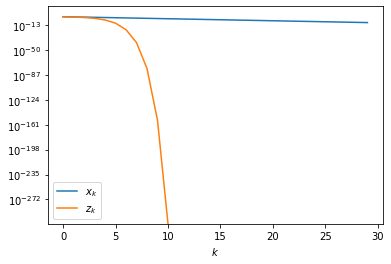

In [13]:
plt.semilogy(x)
plt.semilogy(z)
plt.xlabel("$k$")
plt.legend(["$x_k$","$z_k$"])
plt.show()

In [9]:
np.diff?

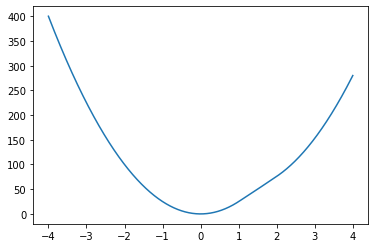

In [64]:
## 5
ll = -4; rr = 4; step = 1e-5
x_range = np.arange(ll,rr,step)
f = [25*x**2 for x in x_range if x<1 ] + \
    [x**2 + 48*x - 24 for x in x_range if 1<=x<=2 ] + \
    [25*x**2 - 48*x + 72 for x in x_range if x>2 ]
plt.plot(x_range,f)
plt.show()

In [105]:
def xk_to_idx(xk):
    return int((xk - ll)/step)

def grad(f,xk):
    idx = xk_to_idx(xk)
    return (f[idx] - f[idx-1])/step 

# gradient descent
xk = 2.2
xk_list_gd = [2.2]
alpha= 1/50
for k in range(1,11):
    xk = xk - alpha*grad(f,xk)
    xk_list_gd.append(xk)
print(xk_list_gd)
    

[2.2, 0.9600000650900258, 1.2918890224256074e-07, 8.573521830020889e-08, 1.4228153361552355e-07, 9.882784967317169e-08, 1.5537416498848635e-07, 1.1192048104613449e-07, 6.846679710378264e-08, 1.2501311241909728e-07, 8.155942847674543e-08]


In [106]:
# heavy ball
xk = 2.2
xk_list_hb = [2.2]
alpha = 1/18
beta = 4/9
for k in range(1,11):
    if(k==1):
        xk_prev = xk
    else:
        xk_prev = xk_list_hb[-2]
    xk = xk + beta*(xk - xk_prev) - alpha * grad(f,xk)
    xk_list_hb.append(xk)
print(xk_list_hb)

[2.2, -1.2444442636388175, 0.6814814878592905, -0.3555552464745724, 0.17119330321102366, -0.07023301397806753, 0.017558501489249728, 0.007803499145844252, -0.018208011514569314, 0.02080952954394693, -0.0196533507571324]


In [107]:
# Nesterov
xk = 2.2
xk_list_ns = [2.2]
alpha = 1/50

for k in range(1,11):
    beta = (k-1)/(k+2)
    if(k==1):
        xk_prev = xk
    else:
        xk_prev = xk_list_ns[-2]
    xk = xk + beta*(xk - xk_prev) - alpha * grad(f, xk + beta*(xk - xk_prev) )
    xk_list_ns.append(xk)
print(xk_list_ns)

[2.2, 0.9600000650900258, 1.430444855898827e-07, 1.295264100420468e-07, 7.931368832577698e-08, 1.0716701980322317e-07, 8.112166803427519e-08, 1.2030441550362452e-07, 1.042786547898172e-07, 1.4916987140418108e-07, 1.3938459992260213e-07]


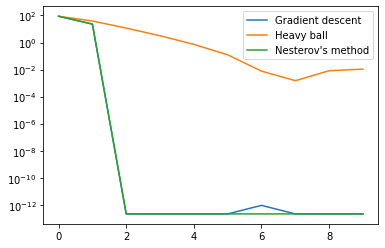

In [108]:
f_gd = []
f_hb = []
f_ns = []
for k in range(10):
    f_gd.append(f[round((xk_list_gd[k]-ll)/step)]) 
    f_hb.append(f[round((xk_list_hb[k]-ll)/step)]) 
    f_ns.append(f[round((xk_list_ns[k]-ll)/step)])

plt.semilogy(f_gd)
plt.semilogy(f_hb)
plt.semilogy(f_ns)
plt.legend(["Gradient descent","Heavy ball","Nesterov's method"])
plt.show()

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def func(x):
    if x<1:
        val = 25*x**2
    elif 1<=x<=2:
        val = x**2 + 48*x - 24
    else:
        val = 25*x**2 - 48*x + 72 
    return val

def grad(x):
    if x<1:
        val = 50*x
    elif 1<=x<=2:
        val = 2*x + 48
    else:
        val = 50*x - 48
    return val

In [61]:
num_iter = 50
# gradient descent
xk = 2.2
xk_list_gd = [2.2]
alpha= 1/50
flag = 0
for k in range(num_iter):
    xk = xk - alpha*grad(xk)
    xk_list_gd.append(xk)
    if(k > 2 and func(xk_list_gd[-2])-func(xk_list_gd[-1]) < 1e-6 and flag == 0):
            flag = 1; print("Converged after iteration " + str(k) + \
                  ", tolerance = 1e-6 " + ", val = "  + str(func(xk)))
# heavy ball
xk = 2.2
xk_list_hb = [2.2]
alpha = 1/18
beta = 4/9
flag = 0
for k in range(num_iter):
    if(k==0):
        xk_prev = xk
    else:
        xk_prev = xk_list_hb[-2]
    xk = xk + beta*(xk - xk_prev) - alpha * grad(xk)
    xk_list_hb.append(xk)
    if(k > 2 and func(xk_list_hb[-2])-func(xk_list_hb[-1]) < 1e-6 and flag == 0):
            flag = 1; print("Converged after iteration " + str(k) + \
                  ", tolerance = 1e-6 " + ", val = "  + str(func(xk)))
# Nesterov
xk = 2.2
xk_list_ns = [2.2]
alpha = 1/50
flag = 0
for k in range(1,num_iter+1):
    beta = (k-1)/(k+2)
    if(k==1):
        xk_prev = xk
    else:
        xk_prev = xk_list_ns[-2]
    xk = xk + beta*(xk - xk_prev) - alpha * grad(xk + beta*(xk - xk_prev) )
    xk_list_ns.append(xk)
    if(k > 2 and func(xk_list_ns[-2])-func(xk_list_ns[-1]) < 1e-6 and flag == 0):
            flag = 1;print("Converged after iteration " + str(k) + \
                  ", tolerance = 1e-6 " + ", val = "  + str(func(xk)))


Converged after iteration 3, tolerance = 1e-6 , val = 0.0
Converged after iteration 7, tolerance = 1e-6 , val = 0.008288833686335918
Converged after iteration 3, tolerance = 1e-6 , val = 0.0


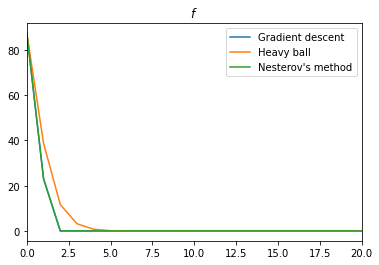

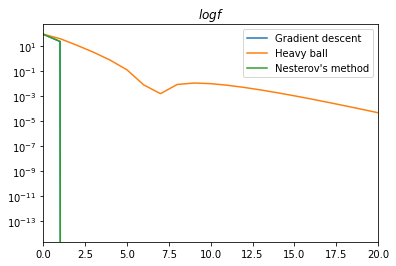

In [62]:
# Plot
f_gd = [func(x) for x in xk_list_gd]
f_hb = [func(x) for x in xk_list_hb]
f_ns = [func(x) for x in xk_list_ns]

plt.plot(f_gd)
plt.plot(f_hb)
plt.plot(f_ns)
plt.xlim([0,20])
plt.title("$f$")
plt.legend(["Gradient descent","Heavy ball","Nesterov's method"])
plt.show()

plt.semilogy(f_gd)
plt.semilogy(f_hb)
plt.semilogy(f_ns)
plt.xlim([0,20])
plt.title("$logf$")
plt.legend(["Gradient descent","Heavy ball","Nesterov's method"])
plt.show()

In [6]:
# 4f
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(2020) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)

In [7]:
print(x.shape,y.shape)
x = np.concatenate([x,np.ones(100).reshape(100,1)],axis=1,dtype=np.float128)
print(x.shape,y.shape)

(100, 2) (100,)
(100, 3) (100,)


In [8]:
def func(t):
    val = 0
    N = 100
    for n in range(N):
        val += -1* (y[n]*(t.T @ x[n,:]) - np.log(1+np.exp(t.T @ x[n,:])))
    return val

def grad(t):
    val = 0
    N = 100
    for n in range(N):
        val += -1* (y[n]*x[n,:].reshape(3,1) - (np.exp(t.T @ x[n,:]) * x[n,:].reshape(3,1))/(1+np.exp(t.T @ x[n,:])))
    return val

In [9]:
num_iter = 10000
f_list = []

# gradient descent
tk = np.zeros((3,1),dtype=np.float128)
alpha= 0.001

for k in range(num_iter):
#     print(func(tk))
    tk = tk - alpha*grad(tk)
    f_list.append(func(tk))
    if(k > 2):
        if(f_list[-2]-f_list[-1] < 1e-6):
            print("Converged after iteration " + str(k+1) + ", tolerance = 1e-6 " + ", -f(tk) = " + str(func(tk)))
            break

Converged after iteration 2122, tolerance = 1e-6 , -f(tk) = [21.07719589]


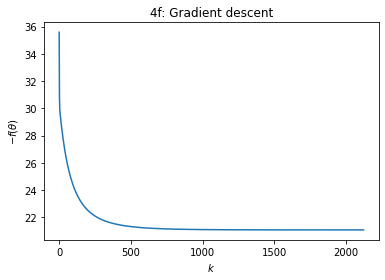

In [10]:
plt.plot(f_list)
plt.xlabel("$k$");plt.ylabel(r"$-f(\theta)$");plt.title("4f: Gradient descent")
plt.show()

In [11]:
def func(t):
    val = 0; N = 100
    for n in range(N):
        val += -1* (y[n]*(t.T @ x[n,:]) - np.log(1+np.exp(t.T @ x[n,:])))
    return val

def grad(t):
    val = 0; N = 100
    for n in range(N):
        val += -1* (y[n]*x[n,:].reshape(3,1)-(np.exp(t.T @ x[n,:]) * x[n,:].reshape(3,1))/(1+np.exp(t.T @ x[n,:])))
    return val

def ls_grad(alpha,tk,dk):
    val = 0; N = 100
    for n in range(N):
        val+=-1*(y[n]*(x[n,:] @ dk)-((dk.T @ x[n,:].reshape(3,1))/(1+np.exp((tk + alpha*dk).T @ -x[n,:].reshape(3,1)))))
    return val

def ls(tk, dk):
    a = 0; b = 1; num_iter = 1000; tolerance = 1e-4
    alpha_list = []
    for k in range(num_iter):
        alpha = (a + b)/2.0
        if(ls_grad(alpha,tk,dk) > 0):
            b = alpha
        else:
            a = alpha
        alpha_list.append(alpha)
        if(k > 2):
            if(alpha_list[-2]-alpha_list[-1] < tolerance ):
                break     
    return alpha, k+1

In [12]:
num_iter = 10000; f_list = [];ls_iter_list = []
tk = np.zeros((3,1),dtype=np.float128)

for k in range(num_iter):
    alpha, ls_iter = ls(tk, -grad(tk))
    tk = tk - alpha*grad(tk)
    ls_iter_list.append(ls_iter)
    f_list.append(func(tk))
    if(k > 2):
        if(f_list[-2]-f_list[-1] < 1e-6 ):
            break
print("Converged after iteration " + str(k+1) + ", tolerance = 1e-6 " + ", -f(tk) = "  + str(func(tk)))
print("Combined iterations: ", np.sum(ls_iter_list) + k + 1)

Converged after iteration 359, tolerance = 1e-6 , -f(tk) = [21.07698612]
Combined iterations:  3636


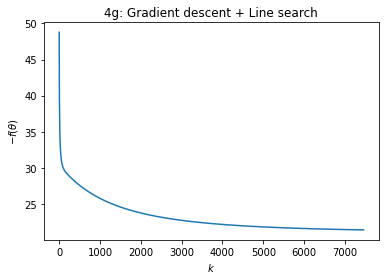

In [58]:
plt.plot(f_list)
plt.xlabel("$k$");plt.ylabel(r"$-f(\theta)$");plt.title("4g: Gradient descent + Line search")
plt.show()

## Homework 5

### Q4

In [3]:
# 4
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def func(x):
    x1 = x[0]; x2 = x[1]
    return np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) + np.exp(-x1 - 0.1)

def grad(x):
    x1 = x[0]; x2 = x[1]
    g1 = np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) - np.exp(-x1 - 0.1)
    g2 = 3*np.exp(x1 + 3*x2 - 0.1) -3*np.exp(x1 - 3*x2 - 0.1)
    return np.array([g1,g2])

def hessian(x):
    x1 = x[0]; x2 = x[1]
    g11 = np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) + np.exp(-x1 - 0.1)
    g12 = 3*np.exp(x1 + 3*x2 - 0.1) -3* np.exp(x1 - 3*x2 - 0.1)
    g21 = 3*np.exp(x1 + 3*x2 - 0.1) -3* np.exp(x1 - 3*x2 - 0.1)
    g22 = 9*np.exp(x1 + 3*x2 - 0.1) + 9*np.exp(x1 - 3*x2 - 0.1)
    return np.array([[g11,g12],[g21,g22]])

In [35]:
def gd(func, grad, x0, tol):
    num_iter = 10000; alpha= 0.05
    xk = x0; xk_list_gd = [xk]
    
    for k in range(num_iter):
        xk = xk - alpha*grad(xk)
        xk_list_gd.append(xk)
        if(np.linalg.norm(grad(xk)) < tol):
            print("Gradient Descent: Converged after iteration " +str(k+1)+ \
                  ", tolerance = " + str(tol) + ", val = " + str(func(xk)))
            break
    return np.array(xk_list_gd)

def heavyball(func, grad, x0, tol):
    num_iter = 10000; xk = x0; xk_list_hb = [xk]
    alpha = 0.05; beta = 0.7

    for k in range(num_iter):
        if(k==0):
            xk_prev = xk
        else:
            xk_prev = xk_list_hb[-2]
        xk = xk + beta*(xk - xk_prev) - alpha * grad(xk)
        xk_list_hb.append(xk)
        if(k > 2 and np.linalg.norm(grad(xk)) < tol ):
                print("Heavy Ball: Converged after iteration " +str(k+1)+ \
                      ", tolerance = " + str(tol) + ", val = " +str(func(xk)))
                break
    return np.array(xk_list_hb)

def nesterov(func, grad, x0, tol):
    num_iter = 10000; xk = x0
    xk_list_ns = [xk]; alpha = 0.05

    for k in range(1,num_iter+1):
        beta = (k-1)/(k+2)
        if(k==1):
            xk_prev = xk
        else:
            xk_prev = xk_list_ns[-2]
        xk = xk + beta*(xk - xk_prev) - alpha * grad(xk + beta*(xk - xk_prev) )
        xk_list_ns.append(xk)
        if(k > 2 and np.linalg.norm(grad(xk)) < tol  ):
            print("Nesterov: Converged after iteration " + str(k) + \
                  ", tolerance = "+str(tol)+ ", val = "  + str(func(xk)))
            break
    return np.array(xk_list_ns)

def newton(func, grad, hessian, x0, tol):
    num_iter = 10000;
    xk = x0;xk_list_newton = [xk]

    for k in range(num_iter):
        xk = xk - np.linalg.inv(hessian(xk)) @ grad(xk)
        xk_list_newton.append(xk)
        if(k > 2 and np.linalg.norm(grad(xk)) < tol ):
                print("Newton: Converged after iteration " +str(k+1)+ \
                      ", tolerance = " + str(tol) + ", val = " +str(func(xk)))
                break
    return np.array(xk_list_newton)

In [36]:
tol = 1e-5
x0 = np.array([-0.45,0.35])
xk_list_gd = gd(func, grad, x0, tol)
xk_list_hb = heavyball(func, grad, x0, tol)
xk_list_ns = nesterov(func, grad, x0, tol)
xk_list_newton1 = newton(func, grad, hessian, x0, tol = 1e-5)
xk_list_newton2 = newton(func, grad, hessian, x0, tol = 1e-10)

Gradient Descent: Converged after iteration 78, tolerance = 1e-05, val = 2.5592666966736948
Heavy Ball: Converged after iteration 62, tolerance = 1e-05, val = 2.55926669665983
Nesterov: Converged after iteration 61, tolerance = 1e-05, val = 2.5592666966591824
Newton: Converged after iteration 4, tolerance = 1e-05, val = 2.5592666966582156
Newton: Converged after iteration 4, tolerance = 1e-10, val = 2.5592666966582156


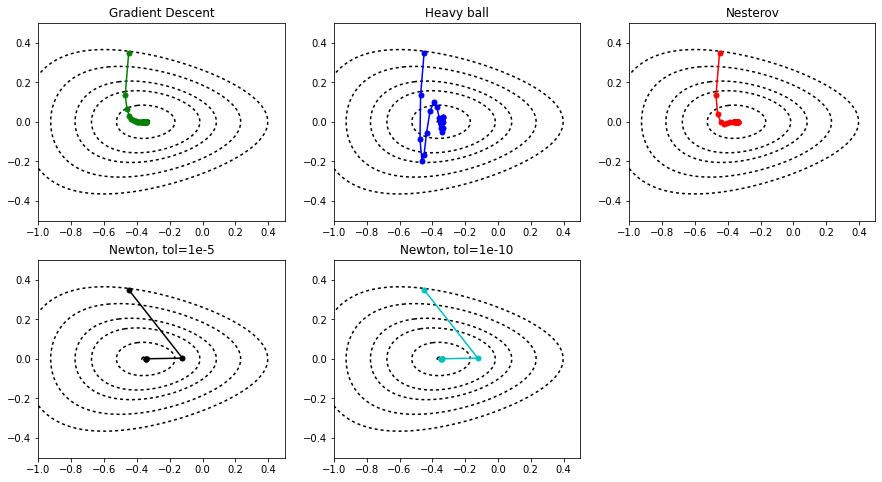

In [40]:
# Plot
def obj_func(x):
    return np.exp(x[0]+3*x[1]-.1)+np.exp(x[0]-3*x[1]-.1)+np.exp(-x[0]-.1)

# plot the the level sets
plt.figure(figsize=(15,8))
num_gridpoint = 300
xx = np.linspace(-1.,.5,num_gridpoint)
X1, X2 = np.meshgrid(xx, -xx)
fx = np.zeros_like(X1)
for i in range(num_gridpoint):
    for j in range(num_gridpoint):
        fx[i,j] = obj_func(np.array([X1[i,j],X2[i,j]]))

plt.subplot(231)
CS=plt.contour(X1, X2, fx, levels=[2.56, 2.6, 2.7, 2.8, 3., 3.3], colors='black')
plt.xlim([-1.,.5])
plt.ylim([-.5,.5])
for c in CS.collections:
    c.set_dashes([(0, (2.0, 2.0))])
plt.plot(xk_list_gd[:,0],xk_list_gd[:,1],'-go',markersize=5) 
plt.title("Gradient Descent")

plt.subplot(232)
CS=plt.contour(X1, X2, fx, levels=[2.56, 2.6, 2.7, 2.8, 3., 3.3], colors='black')
plt.xlim([-1.,.5])
plt.ylim([-.5,.5])
for c in CS.collections:
    c.set_dashes([(0, (2.0, 2.0))])
plt.plot(xk_list_hb[:,0],xk_list_hb[:,1],'-bo',markersize=5) 
plt.title("Heavy ball")

plt.subplot(233)
CS=plt.contour(X1, X2, fx, levels=[2.56, 2.6, 2.7, 2.8, 3., 3.3], colors='black')
plt.xlim([-1.,.5])
plt.ylim([-.5,.5])
for c in CS.collections:
    c.set_dashes([(0, (2.0, 2.0))])
plt.plot(xk_list_ns[:,0],xk_list_ns[:,1],'-ro',markersize=5) 
plt.title("Nesterov")

plt.subplot(234)
CS=plt.contour(X1, X2, fx, levels=[2.56, 2.6, 2.7, 2.8, 3., 3.3], colors='black')
plt.xlim([-1.,.5])
plt.ylim([-.5,.5])
for c in CS.collections:
    c.set_dashes([(0, (2.0, 2.0))])
plt.plot(xk_list_newton1[:,0],xk_list_newton1[:,1],'-ko',markersize=5) 
plt.title("Newton, tol=1e-5")

plt.subplot(235)
CS=plt.contour(X1, X2, fx, levels=[2.56, 2.6, 2.7, 2.8, 3., 3.3], colors='black')
plt.xlim([-1.,.5])
plt.ylim([-.5,.5])
for c in CS.collections:
    c.set_dashes([(0, (2.0, 2.0))])
plt.plot(xk_list_newton2[:,0],xk_list_newton2[:,1],'-co',markersize=5) 
plt.title("Newton, tol=1e-10")

plt.show()

### Q5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(2020) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=6.0)
print(x.shape,y.shape)
x = np.concatenate([x,np.ones(100).reshape(100,1)],axis=1,dtype=np.float128)
print(x.shape,y.shape)

(100, 2) (100,)
(100, 3) (100,)


In [2]:
def func(t):
    val = 0; N = 100
    for n in range(N):
        val += -1* (y[n]*(t.T @ x[n,:]) - np.log(1+np.exp(t.T @ x[n,:])))
    return val

def grad(t):
    val = 0; N = 100
    for n in range(N):
        val += -1* (y[n]*x[n,:].reshape(3,1)-(np.exp(t.T @ x[n,:]) * x[n,:].reshape(3,1))/(1+np.exp(t.T @ x[n,:])))
    return val

def hessian(t):
    val = 0; N = 100
    for n in range(N):
        val += (np.exp(t.T @ x[n,:])*(np.outer(x[n,:],x[n,:])))/(1+np.exp(t.T @ x[n,:]))**2
    return val

def ls_grad(alpha,tk,dk):
    val = 0; N = 100
    for n in range(N):
        val+=-1*(y[n]*(x[n,:] @ dk)-((dk.T @ x[n,:].reshape(3,1))/(1+np.exp((tk + alpha*dk).T @ -x[n,:].reshape(3,1)))))
    return val

def ls(tk, dk):                
    alpha = 1; c = 0.75; rho = 0.5;tolerance = 1e-4
    alpha_list = []
    k = 0
    while(func(tk + alpha*dk) > func(tk) + c*alpha*ls_grad(0,tk,dk)):
        alpha = rho*alpha
        alpha_list.append(alpha)
        if(k > 2 and abs(alpha_list[-2]-alpha_list[-1]) < tolerance ):
            break
        k=k+1
        
    return alpha, k

In [3]:
#5a
num_iter = 10000; f_list = [];ls_iter_list = []
tk = np.zeros((3,1),dtype=np.float128)

for k in range(num_iter):
    alpha, ls_iter = ls(tk, -grad(tk))
    tk = tk - alpha*grad(tk)
    ls_iter_list.append(ls_iter)
    f_list.append(func(tk))
    if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
            break
print("Converged after iteration " + str(k+1) + ", tolerance = 1e-6 " + ", -f(tk) = "  + str(func(tk)))
print("Combined iterations: ", np.sum(ls_iter_list) + k + 1)

Converged after iteration 254, tolerance = 1e-6 , -f(tk) = [21.0770481]
Combined iterations:  2280


In [4]:
#5b
num_iter = 10000; tol = 1e-6; f_list = []
tk = np.zeros((3,1),dtype=np.float128)
tk_list_hb = [tk]
alpha = 0.001; beta = 0.9

for k in range(num_iter):
    if(k==0):
        tk_prev = tk
    else:
        tk_prev = tk_list_hb[-2]
    tk = tk + beta*(tk - tk_prev) - alpha * grad(tk)
    tk_list_hb.append(tk)
    f_list.append(func(tk))
    if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
            break
            
print("Converged after iteration " + str(k+1) + ", tolerance = " + str(tol) + ", -f(tk) = "  + str(func(tk)))

Converged after iteration 154, tolerance = 1e-06, -f(tk) = [21.0769481]


In [6]:
#5b with backtracking 
num_iter = 10000; tol = 1e-6;f_list = []; ls_iter_list = []
tk = np.zeros((3,1),dtype=np.float128)
tk_list_hb = [tk]
beta = 0.9

for k in range(num_iter):
    if(k==0):
        tk_prev = tk
    else:
        tk_prev = tk_list_hb[-2]
    alpha, ls_iter = ls(tk + beta*(tk - tk_prev), -grad(tk)) 
    tk = tk + beta*(tk - tk_prev) - alpha * grad(tk)
    tk_list_hb.append(tk)
    ls_iter_list.append(ls_iter)
    f_list.append(func(tk))
    if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
            break
            
print("Converged after iteration " + str(k+1) + ", tolerance = " + str(tol) + ", -f(tk) = "  + str(func(tk)))
print("Combined iterations: ", np.sum(ls_iter_list) + k + 1)

Converged after iteration 90, tolerance = 1e-06, -f(tk) = [21.0769925]
Combined iterations:  935


In [7]:
#5c
num_iter = 10000; tol = 1e-6; f_list = []
tk = np.zeros((3,1),dtype=np.float128)
tk_list_ns = [tk]; alpha = 0.001
for k in range(1,num_iter+1):
    beta = (k-1)/(k+2)
    if(k==1):
        tk_prev = tk
    else:
        tk_prev = tk_list_ns[-2]
    tk = tk + beta*(tk - tk_prev) - alpha * grad(tk + beta*(tk - tk_prev) )
    tk_list_ns.append(tk)
    f_list.append(func(tk))
    if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
        break
print("Converged after iteration " + str(k+1) + ", tolerance = " + str(tol) + ", -f(tk) = "  + str(func(tk)))

Converged after iteration 286, tolerance = 1e-06, -f(tk) = [21.07694714]


In [8]:
# 5c with backtracking
num_iter = 10000; tol = 1e-6; f_list = []; ls_iter_list = []
tk = np.zeros((3,1),dtype=np.float128)
tk_list_ns = [tk];
for k in range(1,num_iter+1):
    beta = (k-1)/(k+2)
    if(k==1):
        tk_prev = tk
    else:
        tk_prev = tk_list_ns[-2]
    alpha, ls_iter = ls(tk + beta*(tk - tk_prev), -grad(tk+ beta*(tk - tk_prev))) 
    tk = tk + beta*(tk - tk_prev) - alpha * grad(tk + beta*(tk - tk_prev) )
    tk_list_ns.append(tk)
    ls_iter_list.append(ls_iter)
    f_list.append(func(tk))
    if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
        break
print("Converged after iteration " + str(k+1) + ", tolerance = " + str(tol) + ", -f(tk) = "  + str(func(tk)))
print("Combined iterations: ", np.sum(ls_iter_list) + k + 1)

Converged after iteration 189, tolerance = 1e-06, -f(tk) = [21.07694665]
Combined iterations:  1774


In [9]:
#5d
num_iter = 10000; tol = 1e-6; f_list = []; ls_iter_list = []
tk = np.zeros((3,1))
tk_list_newton = [tk]

for k in range(num_iter):
    
    dk = -np.linalg.inv(hessian(tk).astype(np.float64)) @ grad(tk)
    alpha, ls_iter = ls(tk, dk)
    tk = tk + alpha*dk
    
    ls_iter_list.append(ls_iter)
    f_list.append(func(tk))
    tk_list_newton.append(tk)
    if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
        break
        
print("Converged after iteration " + str(k+1) + ", tolerance = " + str(tol) + ", -f(tk) = "  + str(func(tk)))
print("Combined iterations: ", np.sum(ls_iter_list) + k + 1)

Converged after iteration 18, tolerance = 1e-06, -f(tk) = [21.07694656]
Combined iterations:  36


## Homework 6

In [1]:
#3b
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import scipy.io

In [2]:
mat = scipy.io.loadmat('hw06p03.mat')
A = mat['A']
y = mat['y']

In [3]:
print(A.shape)
print(y.shape)

(20, 15)
(20, 1)


In [19]:
def proximal(z):
    N = 2
    x = cp.Variable((N,1))
    t = 1
    cost = cp.norm(x, 'inf') + (1/(2*t))*(cp.norm(x-z)**2)
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()
    
    return x.value

def function(x,z):
    t = 1
    return np.linalg.norm(x,ord = np.inf) + (1/(2*t))*np.linalg.norm(x-z)**2

z = np.array([10,10]).reshape(2,1)
print(proximal(z))
print(function(proximal(z),z))    

[[9.50000453]
 [9.50000453]]
9.750000000020492


In [33]:
xk = z
t = 1
f_list = []
xk_list = []

for k in range(1000):
#     print(function(xk,z))
    xk = xk * 0.999 #squeeze
    if(k>2 and f_list[-1] < function(xk,z)):
        break
    f_list.append(function(xk,z))
    xk_list.append(xk)

print(xk[-1])

[9.49304168]


In [21]:
a = np.array([1,3,4,2]).astype(float)
a[np.argmax(a)] *= 0.99
a

array([1.  , 3.  , 3.96, 2.  ])

In [4]:
def prox1(z, t, alpha = 0.02):
    N = len(z)
    # Define and solve the CVXPY problem.
    x = cp.Variable((N,1))
    cost = t*cp.norm(x, 'inf') + (1/(2*alpha))*(cp.norm(x-z)**2)
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()

    return x.value

def prox(z,t, alpha = 0.02):
    xk = z.astype(float)
    f_list = []
    xk_list = []

    for k in range(100000):
        xk[np.argmax(xk)] *= 0.9999999 #squeeze
        if(k>2 and f_list[-1] < prox_func(xk,z,t)):
            break
        f_list.append(prox_func(xk,z,t))
        xk_list.append(xk)
    
    return xk_list[-1]

def prox_func(x,z,t,alpha = 0.02):
    return t*np.linalg.norm(x,ord = np.inf) + (1/(2*alpha))*(np.linalg.norm(x-z)**2)

def func(x,t):
    return 0.5*(np.linalg.norm(y-A@x))**2 + t* np.linalg.norm(x, ord = np.inf)

In [15]:
num_iter = 10000; tol = 1e-6;
xk = np.zeros((15,1))
alpha = 0.02
f_list = []
t = 1.0

for k in range(num_iter):
    xk = prox1(xk + alpha* A.T @ (y - A@xk) , t = t)
    f_list.append(func(xk, t=t))
    if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
        print("Converged after iteration " + str(k+1) + ", tolerance = " + 
              str(tol) + ", f(xk) = "  + str(func(xk,t)))
        break

num_iter = 10000; tol = 1e-6;
xk = np.zeros((15,1))
alpha = 0.02
f_list = []
t = 1.0

for k in range(num_iter):
    xk = prox1(xk + alpha* A.T @ (y - A@xk) , t = t)
    f_list.append(func(xk, t=t))
    if(k > 2 and (f_list[-2]-f_list[-1]) < 1e-6 ):
        print("Converged after iteration " + str(k+1) + ", tolerance = " + 
              str(tol) + ", f(xk) = "  + str(func(xk,t)))
        break
        
f_1 = func(xk,t)
f1_list = f_list

Converged after iteration 239, tolerance = 1e-06, f(xk) = 2.8080157184580488
Converged after iteration 239, tolerance = 1e-06, f(xk) = 2.8080157184580488


In [16]:
# num_iter = 10000; tol = 1e-6;
# xk = np.zeros((15,1))
# alpha = 0.02
# f_list = []
# t = 5

# for k in range(num_iter):
# #     print(k)
# #     print(xk)
# #     print(func(xk, t=t))
#     xk = prox1(xk + alpha* A.T @ (y - A@xk) , t = t)
#     f_list.append(func(xk, t=t))
#     if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
#         print("Converged after iteration " + str(k+1) + ", tolerance = " + 
#               str(tol) + ", f(xk) = "  + str(func(xk,t)))
#         break

num_iter = 10000; tol = 1e-6;
xk = np.zeros((15,1))
alpha = 0.02
f_list = []
t = 5

for k in range(num_iter):
    xk = prox1(xk + alpha* A.T @ (y - A@xk) , t = t)
    f_list.append(func(xk, t=t))
    if(k > 2 and f_list[-2]-f_list[-1] < 1e-6 ):
        print("Converged after iteration " + str(k+1) + ", tolerance = " + 
              str(tol) + ", f(xk) = "  + str(func(xk,t)))
        break
        
f_5 = func(xk,t)
f5_list = f_list

Converged after iteration 123, tolerance = 1e-06, f(xk) = 5.386938910362338


In [17]:
# num_iter = 10000; tol = 1e-6;
# xk = np.zeros((15,1))
# alpha = 0.02
# f_list = []
# t = 10

# for k in range(num_iter):
# #     print(k)
# #     print(xk)
# #     print(func(xk, t=t))
#     xk = prox1(xk + alpha* A.T @ (y - A@xk) , t = t)
#     f_list.append(func(xk, t=t))
#     if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
#         print("Converged after iteration " + str(k+1) + ", tolerance = " + 
#               str(tol) + ", f(xk) = "  + str(func(xk,t)))
#         break

num_iter = 10000; tol = 1e-6;
xk = np.zeros((15,1))
alpha = 0.02
f_list = []
t = 10

for k in range(num_iter):

    xk = prox1(xk + alpha* A.T @ (y - A@xk) , t = t)
    f_list.append(func(xk, t=t))
    if(k > 2 and f_list[-2]-f_list[-1] < 1e-6 ):
        print("Converged after iteration " + str(k+1) + ", tolerance = " + 
              str(tol) + ", f(xk) = "  + str(func(xk,t)))
        break
f_10 = func(xk,t)
f10_list = f_list

Converged after iteration 87, tolerance = 1e-06, f(xk) = 6.979859792953597


In [18]:
# num_iter = 10000; tol = 1e-6;
# xk = np.zeros((15,1))
# alpha = 0.02
# f_list = []
# t = 0

# for k in range(num_iter):
# #     print(k)
# #     print(xk)
# #     print(func(xk, t=t))
#     xk = prox1(xk + alpha* A.T @ (y - A@xk) , t = t)
#     f_list.append(func(xk, t=t))
#     if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
#         print("Converged after iteration " + str(k+1) + ", tolerance = " + 
#               str(tol) + ", f(xk) = "  + str(func(xk,t)))
#         break

num_iter = 10000; tol = 1e-6;
xk = np.zeros((15,1))
alpha = 0.02
f_list = []
t = 0

for k in range(num_iter):
#     print(k)
#     print(xk)
#     print(func(xk, t=t))
    xk = prox1(xk + alpha* A.T @ (y - A@xk) , t = t)
    f_list.append(func(xk, t=t))
    if(k > 2 and f_list[-2]-f_list[-1] < 1e-6 ):
        print("Converged after iteration " + str(k+1) + ", tolerance = " + 
              str(tol) + ", f(xk) = "  + str(func(xk,t)))
        break  
f_0 = func(xk,t)
f0_list = f_list

Converged after iteration 347, tolerance = 1e-06, f(xk) = 1.8412290050336948


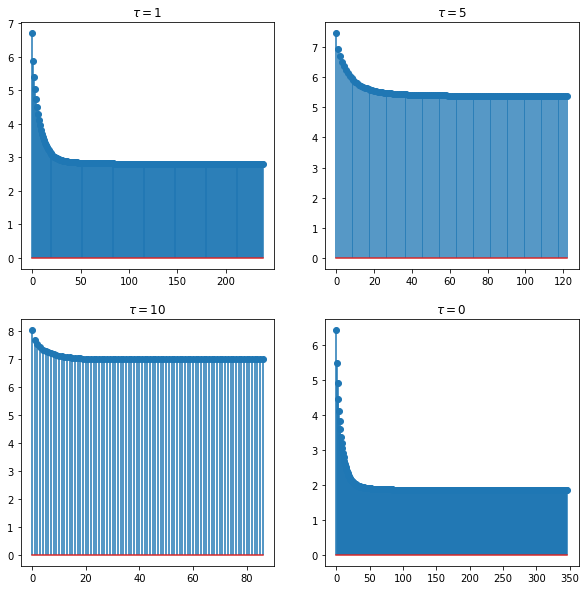

In [19]:
# plt.stem([0,1,5,10],[f_0,f_1,f_5,f_10])
# plt.xticks([0,1,5,10])
# plt.show()

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.stem(f1_list)
plt.title(r"$\tau = 1$")

plt.subplot(222)
plt.stem(f5_list)
plt.title(r"$\tau = 5$")

plt.subplot(223)
plt.stem(f10_list)
plt.title(r"$\tau = 10$")

plt.subplot(224)
plt.stem(f0_list)
plt.title(r"$\tau = 0$")
plt.show()

In [1]:
#4
import numpy as np
import matplotlib.pyplot as plt

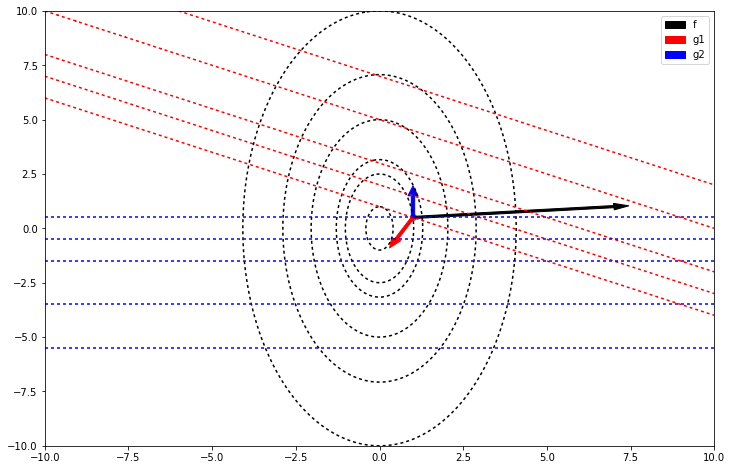

In [34]:
def obj_func(x):
    return 6*(x[0]**2) + x[1]**2
def g1_func(x):
    return -0.5*x[0] - x[1] +1
def g2_func(x):
    return x[1]-0.5

plt.figure(figsize=(12,8))
num_gridpoint = 300
xx = np.linspace(-10,10,num_gridpoint)
X1, X2 = np.meshgrid(xx, -xx)

fx = np.zeros_like(X1)
for i in range(num_gridpoint):
    for j in range(num_gridpoint):
        fx[i,j] = obj_func(np.array([X1[i,j],X2[i,j]]))
CS=plt.contour(X1, X2, fx, levels=[1, 6.25, 10, 25, 50, 100], colors='black')
for c in CS.collections:
    c.set_dashes([(0, (2.0, 2.0))])

    
g1 = np.zeros_like(X1)
for i in range(num_gridpoint):
    for j in range(num_gridpoint):
        g1[i,j] = g1_func(np.array([X1[i,j],X2[i,j]]))
CS=plt.contour(X1, X2, g1, levels=[-6,-4,-2,-1,0], colors='red')
for c in CS.collections:
    c.set_dashes([(0, (2.0, 2.0))])

g2 = np.zeros_like(X1)
for i in range(num_gridpoint):
    for j in range(num_gridpoint):
        g2[i,j] = g2_func(np.array([X1[i,j],X2[i,j]]))
CS=plt.contour(X1, X2, g2, levels=[-6,-4,-2,-1,0], colors='blue')
for c in CS.collections:
    c.set_dashes([(0, (2.0, 2.0))])


plt.scatter(1,0.5)
plt.arrow(1,0.5,0.5*12,0.5*1, color = 'black',width = 0.1)
plt.arrow(1,0.5,-0.5,-1, color = 'red',width = 0.1)
plt.arrow(1,0.5,0,1, color = 'blue',width = 0.1)

plt.legend(['f','g1','g2'])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

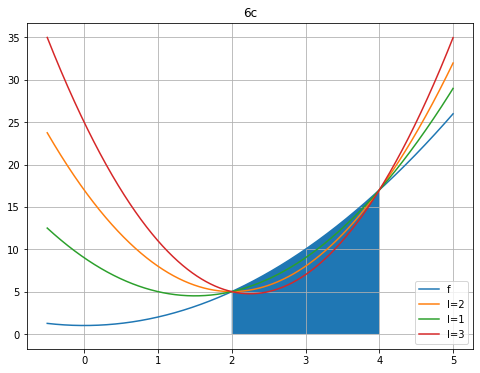

In [57]:
#6
x = np.arange(-0.5,5,0.001)
y = x**2 + 1

def y_lag(l):
    return x**2 + 1 + l*(x**2 -6*x + 8)

plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.fill_between(x,y, where=(x >= 2) & (x <= 4))
plt.plot(x,y_lag(2))
plt.plot(x,y_lag(1))
plt.plot(x,y_lag(3))
plt.title("6c")
plt.legend(["f","l=2","l=1","l=3"])
plt.grid()
plt.show()

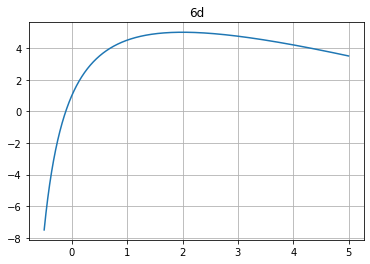

In [58]:
dual = ((-(x**2)) + 9*x + 1)/(x + 1)
plt.plot(x,dual)
plt.title("6d")
plt.grid()
plt.show()

## Homework 7

In [1]:
import numpy as np

In [65]:
#2
C = 0.878
s = np.array([5/8, 1/8, 1/9, 1/13, 1/14, 1/20, 1/23, 1/28]) * C * 20
# print(s)
p = np.array([0.25,0.25,0.25,0.07,0.06,0.05,0.04,0.03])
M = 0.5

l = 0.05
tot = 0
for n in range(8):
    if(p[n]/s[n] >= l):
        print(n)
        tot+= np.sqrt((s[n]*p[n])/l) - s[n]
        print(np.sqrt((s[n]*p[n])/l) - s[n])
print(tot)

1
1.117853754695489
2
1.1722773622548828
3
0.024395095075838036
5
0.05901654200979822
6
0.01804756000627261
2.3915903140422805


In [71]:
np.mean([7*0.195846,8*0.303,0,0,0,0,0,0])

0.47436524999999996

In [61]:
import numpy as np
from numpy import cos,pi, sin
import matplotlib.pyplot as plt
from numpy.linalg import norm

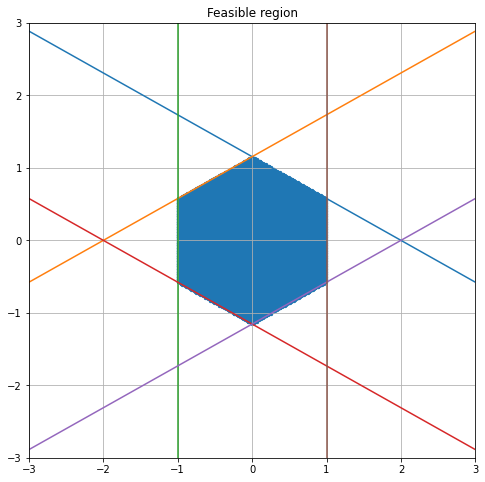

In [97]:
# a1
x = np.arange(-5,5,0.1)
# y = np.arange(-5,5)
c = np.array([1,1])
bm = 1
def am(m):
    return np.array([cos(m*pi/3),sin(m*pi/3)])
def ym(m):
    return (bm-(x*cos(m*pi/3)))/sin(m*pi/3)

plt.figure(figsize=(8,8))
for m in range(1,7):
    plt.plot(x,ym(m))
plt.xlim([-3,3])
plt.ylim([-3,3])

x_list = []
y_list = []

for x in np.arange(-1,1,0.01):
    for y in np.arange(-2,2,0.01):
        if(np.array([x,y])@am(1) <= bm and np.array([x,y])@am(2) <= bm and np.array([x,y])@am(3) <= bm
          and np.array([x,y])@am(4) <= bm and np.array([x,y])@am(5) <= bm and np.array([x,y])@am(6) <= bm):
            x_list.append(x)
            y_list.append(y)
            
x_list = np.array(x_list)
y_list = np.array(y_list)
# z_list = x_list + y_list
plt.scatter(x_list, y_list, s = 5)        
plt.grid()
plt.title("Feasible region")
plt.show()


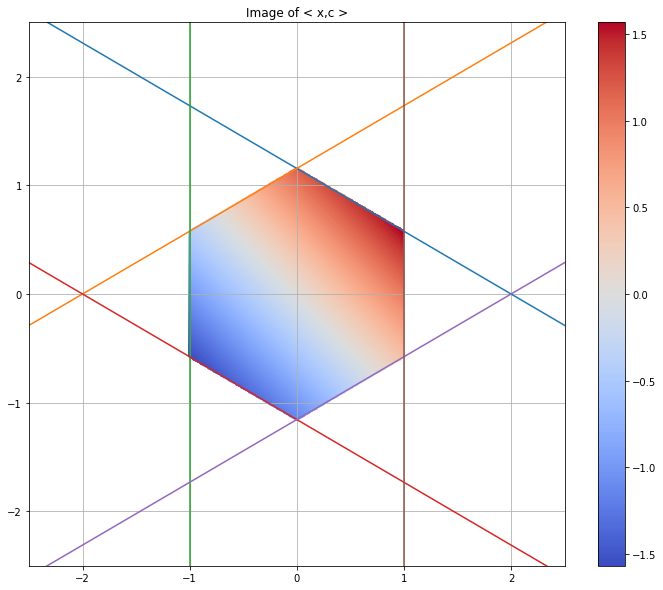

-1.5699999999999987
-1.0 -0.5699999999999987


In [98]:
# a2
x = np.arange(-5,5,0.1)
# y = np.arange(-5,5)
c = np.array([1,1])
bm = 1
def am(m):
    return np.array([cos(m*pi/3),sin(m*pi/3)])
def ym(m):
    return (bm-(x*cos(m*pi/3)))/sin(m*pi/3)

plt.figure(figsize=(12,10))
for m in range(1,7):
    plt.plot(x,ym(m))
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])

x_list = []
y_list = []

for x in np.arange(-1,1,0.01):
    for y in np.arange(-2,2,0.01):
        if(np.array([x,y])@am(1) <= bm and np.array([x,y])@am(2) <= bm and np.array([x,y])@am(3) <= bm
          and np.array([x,y])@am(4) <= bm and np.array([x,y])@am(5) <= bm and np.array([x,y])@am(6) <= bm):
            x_list.append(x)
            y_list.append(y)
            
x_list = np.array(x_list)
y_list = np.array(y_list)
z_list = x_list + y_list
plt.scatter(x_list, y_list , s = 5, c=z_list ,cmap=plt.cm.coolwarm)
plt.colorbar()
plt.grid()
plt.title("Image of < x,c >")
plt.show()

idx = np.argmin(z_list)
print(min(z_list))
print(x_list[idx],y_list[idx])

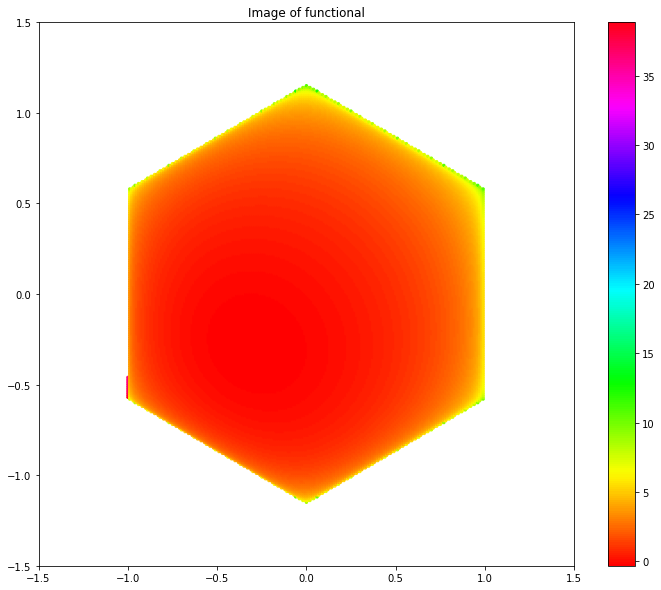

-0.3101121559225729
-0.28999999999999937 -0.2899999999999985


In [80]:
#b
# a2
x = np.arange(-5,5,0.1)
# y = np.arange(-5,5)
c = np.array([1,1])
bm = 1
def am(m):
    return np.array([cos(m*pi/3),sin(m*pi/3)])
def ym(m):
    return (bm-(x*cos(m*pi/3)))/sin(m*pi/3)

def func(x, tau):
    s = 0
    for m in range(1,7):
        s += np.log(bm - x @ am(m))
    return x@c - (s/tau)

plt.figure(figsize=(12,10))
# for m in range(1,7):
#     plt.plot(x,ym(m))
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

x_list = []
y_list = []

for x in np.arange(-1,1.01,0.01):
    for y in np.arange(-2,2.01,0.01):
        if(np.array([x,y])@am(1) < bm and np.array([x,y])@am(2) < bm and np.array([x,y])@am(3) < bm
          and np.array([x,y])@am(4) < bm and np.array([x,y])@am(5) < bm and np.array([x,y])@am(6) < bm):
            x_list.append(x)
            y_list.append(y)
            
x_list = np.array(x_list)
y_list = np.array(y_list)

z_list = []
for i in range(len(x_list)):
    arr = np.array([x_list[i],y_list[i]])
    z_list.append(func(arr,tau=1))

z_list = np.array(z_list)

plt.scatter(x_list, y_list , c=z_list, s = 5, cmap=plt.cm.hsv)
plt.colorbar()
# plt.grid()
plt.title("Image of functional")
plt.show()

idx = np.argmin(z_list)
print(min(z_list))
print(x_list[idx],y_list[idx])

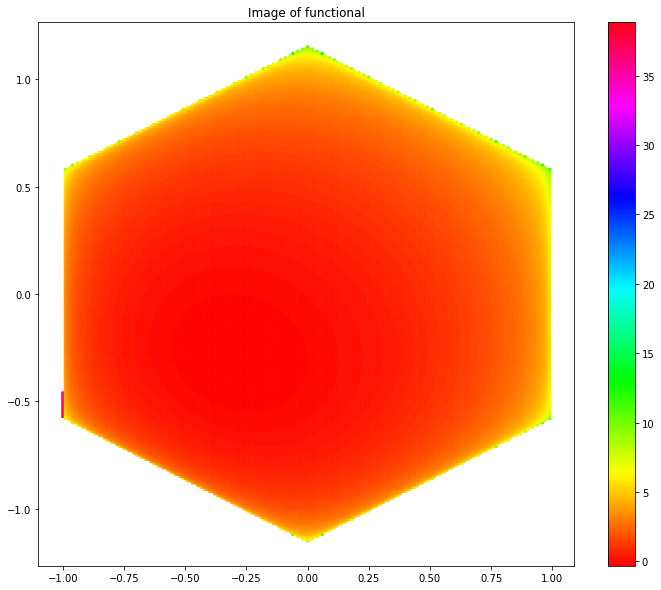

-0.3101121559225729
-0.28999999999999937 -0.2899999999999985


In [79]:
plt.figure(figsize=(12,10))
plt.scatter(x_list, y_list , c=z_list, s = 5, cmap=plt.cm.hsv)
plt.colorbar()
# plt.grid()
plt.title("Image of functional")
plt.show()

idx = np.argmin(z_list)
print(min(z_list))
print(x_list[idx],y_list[idx])

In [36]:
#c
c = np.array([1,1])
bm = 1

def am(m):
    return np.array([cos(m*pi/3),sin(m*pi/3)])

def func(x, tau):
    s = 0
    for m in range(1,7):
        s += np.log(abs(bm - x @ am(m)))
    return x@c - (s/tau)

def grad(x, tau):
    s = 0
    for m in range(1,7):
        s += am(m)/(bm - x @ am(m))
    return c + (s/tau)

def ls_grad(alpha, xk, dk,tau):
    s = 0
    for m in range(1,7):
        s += (dk @ am(m))/(bm - (xk+alpha*dk) @ am(m))
    return dk @ c + (s/tau)

def ls(xk, dk, tau):                
    alpha = 0.001; c = 0.001; rho = 0.8; tolerance = 1e-4
    alpha_list = []
    k = 0
    while(func(xk + alpha*dk, tau) > func(xk, tau) + c*alpha*ls_grad(0,xk,dk, tau)):
        alpha = rho*alpha
        alpha_list.append(alpha)
        k=k+1
        
    return alpha, k

In [40]:
# gradient descent + backtracking
pts = np.zeros((5,2))
tol = 1e-6

for idx,tau in enumerate([1,10,100,500,1000]):
    num_iter = 10000; f_list = []
    alpha = 0.001
    xk = np.zeros(2)

    for k in range(num_iter):
        alpha, ls_iter = ls(xk, -grad(xk,tau), tau)
        xk = xk - alpha*grad(xk,tau)
        f_list.append(func(xk,tau))
        if(k > 2 and norm(grad(xk,tau)) < tol ):
            print("tau:" + str(tau) + " Converged after iteration " + str(k+1) + 
                  ", tolerance = " + str(tol) + ", f(xk) = "  + str(func(xk,tau)))
            break

    pts[idx,:] = xk

print(pts)

tau:1 Converged after iteration 3337, tolerance = 1e-06, f(xk) = -0.3101144375308052
tau:10 Converged after iteration 7405, tolerance = 1e-06, f(xk) = -1.1096379717925449
tau:100 Converged after iteration 2644, tolerance = 1e-06, f(xk) = -1.486119741578432
tau:500 Converged after iteration 1815, tolerance = 1e-06, f(xk) = -1.5526926844753877
tau:1000 Converged after iteration 1699, tolerance = 1e-06, f(xk) = -1.563636805191536
[[-0.291087   -0.28990541]
 [-0.80058956 -0.59492277]
 [-0.97663565 -0.58088046]
 [-0.99527927 -0.5780775 ]
 [-0.99763678 -0.5777151 ]]


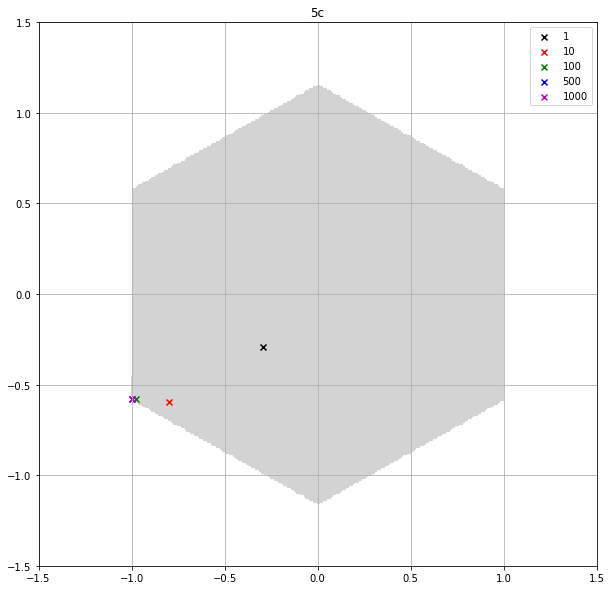

In [41]:
x = np.arange(-5,5,0.1)
# y = np.arange(-5,5)
c = np.array([1,1])
bm = 1

plt.figure(figsize=(10,10))
# for m in range(1,7):
#     plt.plot(x,ym(m))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

x_list = []
y_list = []

for x in np.arange(-1,1,0.01):
    for y in np.arange(-2,2,0.01):
        if(np.array([x,y])@am(1) < bm and np.array([x,y])@am(2) < bm and np.array([x,y])@am(3) < bm
          and np.array([x,y])@am(4) < bm and np.array([x,y])@am(5) < bm and np.array([x,y])@am(6) < bm):
            x_list.append(x)
            y_list.append(y)
            
x_list = np.array(x_list)
y_list = np.array(y_list)
z_list = x_list + y_list
plt.scatter(x_list, y_list , s = 5, c = 'lightgray', label='_nolegend_')
# plt.grid()
plt.scatter(pts[0,0],pts[0,1], c = 'k', marker = 'x')
plt.scatter(pts[1,0],pts[1,1], c = 'r', marker = 'x')
plt.scatter(pts[2,0],pts[2,1], c = 'g', marker = 'x')
plt.scatter(pts[3,0],pts[3,1], c = 'b', marker = 'x')
plt.scatter(pts[4,0],pts[4,1], c = 'm', marker = 'x')
plt.legend(["1","10","100","500","1000"])    
plt.title("5c")
plt.grid()
plt.show()


tau:1 Converged after iteration 3337, tolerance = 1e-06, f(xk) = -0.3101144375308052
tau:10 Converged after iteration 7097, tolerance = 1e-06, f(xk) = -1.1096379717925446
tau:100 Converged after iteration 1513, tolerance = 1e-06, f(xk) = -1.4861197415784313
tau:500 Converged after iteration 256, tolerance = 1e-06, f(xk) = -1.5526926844753879
tau:1000 Converged after iteration 97, tolerance = 1e-06, f(xk) = -1.5636368051915355
Total iterations:  12300


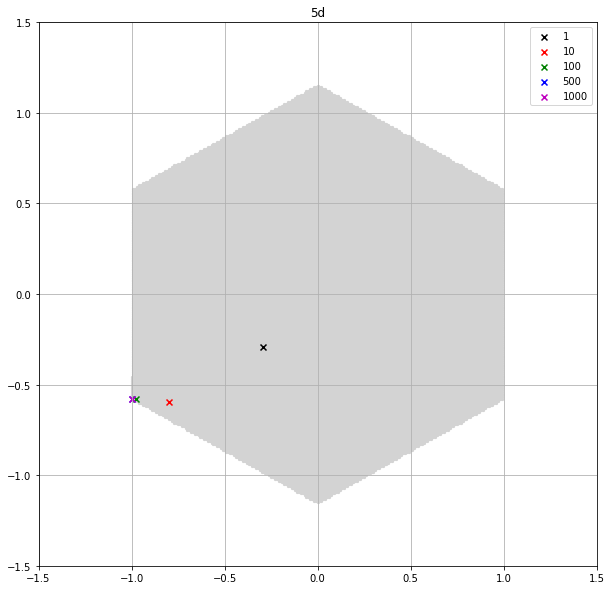

In [39]:
# 5d
pts = np.zeros((5,2))
tol = 1e-6

xk = np.zeros(2)
iter_total = 0
for idx,tau in enumerate([1,10,100,500,1000]):

    num_iter = 10000; f_list = []
    alpha = 0.001
    
    
    for k in range(num_iter):
    #     print(func(xk,tau))
        alpha, ls_iter = ls(xk, -grad(xk,tau), tau)
        xk = xk - alpha*grad(xk,tau)
    #     ls_iter_list.append(ls_iter)
        f_list.append(func(xk,tau))
    #     if(k > 2 and abs(f_list[-2]-f_list[-1]) < 1e-6 ):
    #             break
        if(k > 2 and norm(grad(xk,tau)) < tol ):
            print("tau:" + str(tau) + " Converged after iteration " + str(k+1) + 
                  ", tolerance = " + str(tol) + ", f(xk) = "  + str(func(xk,tau)))
            break
    iter_total += k + 1
    pts[idx,:] = xk

print("Total iterations: ",iter_total)

# Plot
x = np.arange(-5,5,0.1)
# y = np.arange(-5,5)
c = np.array([1,1])
bm = 1

plt.figure(figsize=(10,10))
# for m in range(1,7):
#     plt.plot(x,ym(m))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

x_list = []
y_list = []

for x in np.arange(-1,1,0.01):
    for y in np.arange(-2,2,0.01):
        if(np.array([x,y])@am(1) < bm and np.array([x,y])@am(2) < bm and np.array([x,y])@am(3) < bm
          and np.array([x,y])@am(4) < bm and np.array([x,y])@am(5) < bm and np.array([x,y])@am(6) < bm):
            x_list.append(x)
            y_list.append(y)
            
x_list = np.array(x_list)
y_list = np.array(y_list)
z_list = x_list + y_list
plt.scatter(x_list, y_list , s = 5, c = 'lightgray', label='_nolegend_')
# plt.grid()
plt.scatter(pts[0,0],pts[0,1], c = 'k', marker = 'x')
plt.scatter(pts[1,0],pts[1,1], c = 'r', marker = 'x')
plt.scatter(pts[2,0],pts[2,1], c = 'g', marker = 'x')
plt.scatter(pts[3,0],pts[3,1], c = 'b', marker = 'x')
plt.scatter(pts[4,0],pts[4,1], c = 'm', marker = 'x')
plt.legend(["1","10","100","500","1000"])    
plt.title("5d")
plt.grid()
plt.show()



In [1]:
import numpy as np
import cvxpy as cp
from numpy.linalg import norm,inv

In [2]:
#6

# Create data
m = 30
n = 10
np.random.seed(20212)
A = np.random.randn(m, n)
y = np.random.randn(m)

In [3]:
# Set up CVX problem
x = cp.Variable(n)
objective = cp.Minimize(0.5*cp.norm(A@x - y,2)**2)
constraints = [0 <= x]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`
result = prob.solve()
# The optimal value for x is stored in `x.value`
xstar = x.value
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`
lambdastar = constraints[0].dual_value

In [4]:
#d
print(np.around(A.T @ A @ xstar - A.T @ y - lambdastar , 2))

[-0. -0. -0. -0. -0.  0.  0. -0. -0. -0.]


In [5]:
#e
print(1/norm(A.T @ A))

0.010490435013841334


In [6]:
def func(x):
    return 0.5*norm(y - A @ x)**2

def plus(z):
    z[z<0] = 0
    return z
    
alpha = 0.001; tol = 1e-6
num_iter = 1000
xk = np.zeros(10)
xk_list = []

for k in range(num_iter):
#     print(func(xk))
    xk = plus(xk + alpha * A.T @ (y - A @ xk))
    xk_list.append(xk)
    
    if(k>2 and norm(xk_list[-1] - xk_list[-2]) < tol):
        print("Converged after iteration " + str(k+1) + 
              ",tolerance = " + str(tol) + ", f(xk) = "  + str(func(xk)))
        break

Converged after iteration 505,tolerance = 1e-06, f(xk) = 18.64528339871791


In [7]:
print("CVXPY Result: ",result)

CVXPY Result:  18.64528339548257


In [21]:
#f
xk = np.zeros(10)
lk = np.zeros(10)
tol = 1e-6
num_iter = 100
xk_list = []

for k in range(num_iter):
    xk = plus(inv(A.T@A) @ (A.T @ y + lk))
    xk[lk != 0] = 0 # complementary slackness
    lk = plus(A.T@A@xk - A.T@y)
    lk[xk != 0] = 0 # complementary slackness
    
    xk_list.append(xk)
    
    if(k>2 and norm(xk_list[-1] - xk_list[-2]) < tol):
        print("Converged after iteration " + str(k+1) + 
              ",tolerance = " + str(tol) + ", f(xk) = "  + str(func(xk)))
        break

Converged after iteration 24,tolerance = 1e-06, f(xk) = 18.645283366430647


## Homework 8

In [25]:
# 3
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import scipy.io
from numpy.linalg import norm

In [26]:
mat = scipy.io.loadmat('hw8p3.mat')

In [27]:
Y = mat['Yz']
mask = mat['msk']
delta = 100

In [46]:
# def prox(x, alpha = 1):
#     z = x
#     z[z>1] = 1
#     z[z<-1] = -1
#     return x - (z/alpha)

# def S(x, alpha =0.01):
#     z = x.astype(float)
#     z[z>alpha] = alpha
#     return z

def S(x,alpha = 0.01): # soft threshold
    z = x.astype(float)    
    z[x> alpha] = alpha
    return z

def func(X):
    return (delta/2)*norm((Y-X)*mask) + norm(X, ord= 'nuc')

def prox(X):
    U,d,V = np.linalg.svd(X)
    return U @ (np.diag(d)-np.diag(S(d))) @ V

def grad(X):
    return delta*(X-Y)*mask

In [48]:
num_iter = 10000
alpha = 0.01
Xk = Y
for k in range(num_iter):
    Xk = prox(Xk - alpha*grad(Xk))
    
# print(func(Xk))
print(np.around(Xk))

[[10.  6.  4.  6.  4.  4. 12.  6.]
 [12. 12.  6. 12.  6.  6. 18. 12.]
 [ 6. 10.  4. 10.  4.  4. 12. 10.]
 [ 4.  4.  2.  4.  2.  2.  6.  4.]
 [ 4.  4.  2.  4.  2.  2.  6.  4.]
 [10.  6.  4.  6.  4.  4. 12.  6.]
 [10.  6.  4.  6.  4.  4. 12.  6.]
 [ 6. 10.  4. 10.  4.  4. 12. 10.]]


In [133]:
Y

array([[10,  0,  0,  6,  4,  4, 12,  0],
       [12,  0,  6,  0,  6,  0, 18, 12],
       [ 0, 10,  4, 10,  0,  4,  0, 10],
       [ 0,  0,  2,  4,  0,  2,  6,  4],
       [ 0,  4,  2,  0,  0,  2,  6,  4],
       [10,  0,  4,  6,  0,  4, 12,  0],
       [10,  0,  4,  0,  4,  0, 12,  6],
       [ 6, 10,  0, 10,  4,  0, 12,  0]], dtype=uint8)

In [16]:
# 4 Arrow-Hurwicz primal-dual algorithm
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import scipy.io
from numpy.linalg import norm

In [19]:
mat = scipy.io.loadmat('hw8p4_noisy_signal.mat')
D = mat['D']
N = 1024
y = mat['y']
delta = 1

In [21]:
def func(x):
    return norm(D@x, ord=1) + (delta/2)*norm(y-x, ord = 2)**2

def S(x): # kind of soft thresholding
    x[x>1] = 1
    x[x<-1] = -1
    return x

In [36]:
num_iter = 1000
xk = y
vk = np.zeros((1023,1))
sigma = 0.1; alpha = 0.1
f_list = [func(xk)]

for k in range(num_iter):
    vk = S(vk + sigma*D@xk)
    xk = (alpha*delta*y + xk - alpha*D.T@vk)/(alpha*delta + 1)
    f_list.append(func(xk))
    
print(func(xk))

45.89064868709812


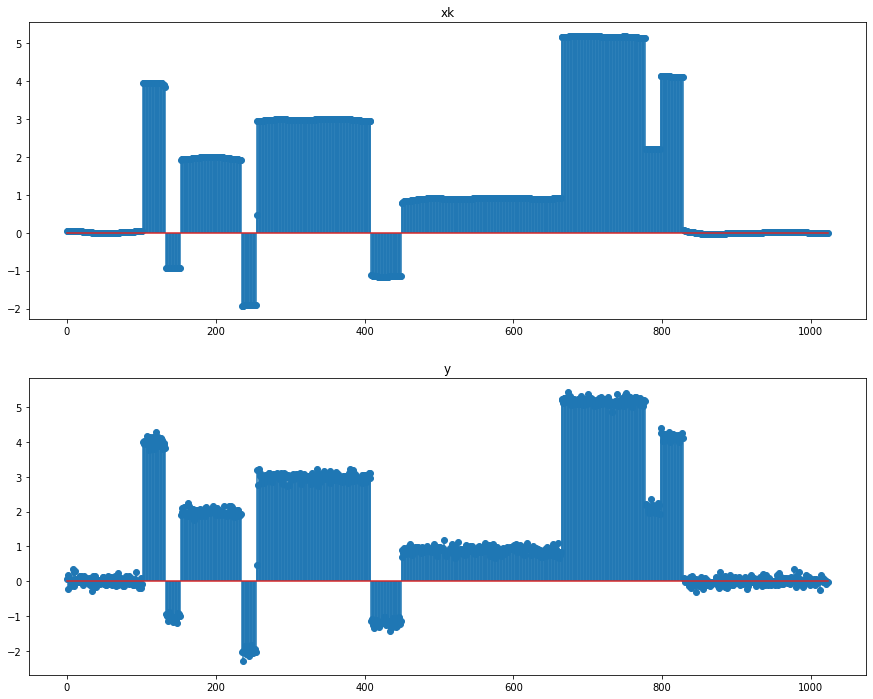

In [37]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
plt.stem(xk)
plt.title("xk")

plt.subplot(2,1,2)
plt.stem(y)
plt.title("y")
plt.show()

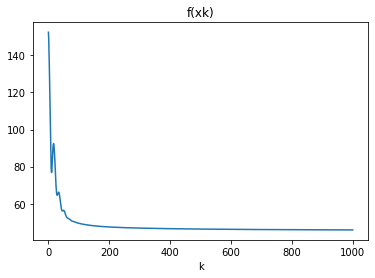

In [39]:
plt.plot(f_list)
plt.xlabel("k")
plt.title("f(xk)")
plt.show()

In [40]:
norm(xk-y)

3.3075568482562763

In [16]:
#5
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [17]:
np.random.seed(2021)
p = np.random.uniform(0,50,[2,10])

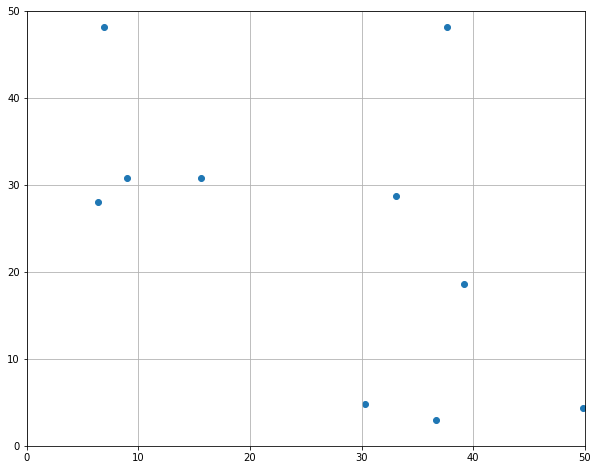

In [18]:
def plot_robot(p):
    plt.figure(figsize=(10,8))
    plt.scatter(p[0,:],p[1,:])
    plt.grid()
    plt.xlim([0,50]); plt.ylim([0,50])
    plt.show()
    
plot_robot(p)

In [19]:
def func(p, delta=6):
    s=0
    
    for n in range(N):
        for m in range(N):
            if(n==m):
                continue
            else:
                s+= (norm(p[:,n]-p[:,m])**2 - delta**2)**2
    
    return s

def grad(p,n, delta=6):
    N = p.shape[1]
    s=0
    for m in range(N):
        if(n==m):
            continue
        else:
            s+= (norm(p[:,n]-p[:,m])**2 - delta**2)*(p[:,n]-p[:,m])
    return s

472


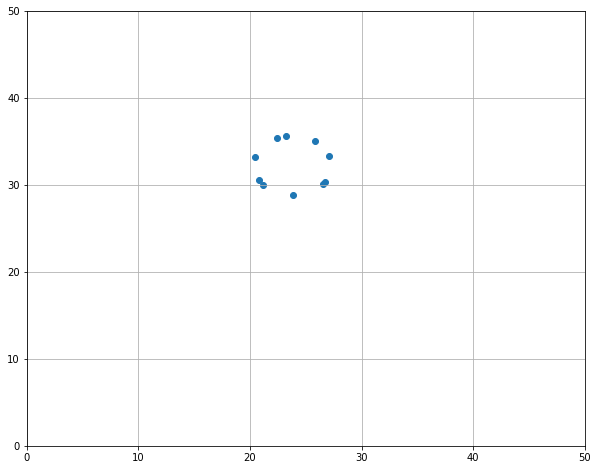

In [20]:
np.random.seed(2021)
p = np.random.uniform(0,50,[2,10])

pk = p
N = p.shape[1]
alpha = 0.0001
delta = 6

for k in range(500):
    if(func(pk) < 30243 ):
        print(k)
        break
    
    for n in range(N):              
        pk[:,n] = pk[:,n] - alpha*grad(pk,n)
    
    
plot_robot(pk)

473


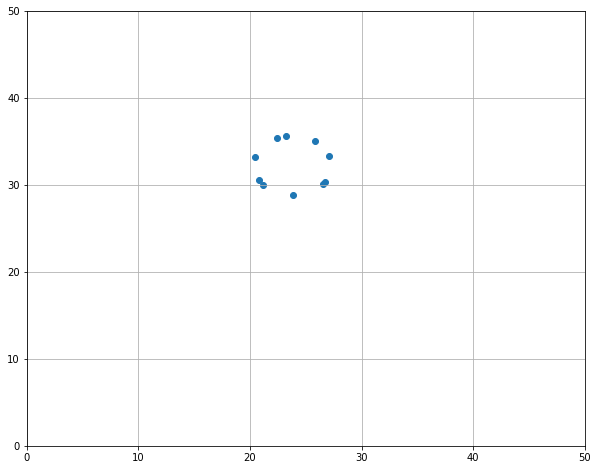

In [24]:
# Nesterov

# for k in range(1,11):
#     beta = (k-1)/(k+2)
#     if(k==1):
#         xk_prev = xk
#     else:
#         xk_prev = xk_list_ns[-2]
#     xk = xk + beta*(xk - xk_prev) - alpha * grad(f, xk + beta*(xk - xk_prev) )
#     xk_list_ns.append(xk)
    
np.random.seed(2021)
p = np.random.uniform(0,50,[2,10])

pk = p
N = p.shape[1]
alpha = 0.0001
delta = 6
pk_list = []

for k in range(1,1000):
    
    beta = (k-1)/(k+2)
    if(k==1):
        pk_prev = pk
    else:
        pk_prev = pk_list[-2]
    
    for n in range(N):
        pk[:,n] = pk[:,n] +beta*(pk[:,n]-pk_prev[:,n]) - alpha*grad(pk + beta*(pk - pk_prev),n)
        pk_list.append(pk)
        
        
plot_robot(pk)